# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [10]:

#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
#print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
#print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18778581,
            "total_supply": 18778581,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 43491.0,
                    "volume_24h": 41802518763,
                    "market_cap": 814441136662,
                    "percentage_change_1h": 0.584173358558897,
                    "percentage_change_24h": 7.78114192500437,
                    "percentage_change_7d": 3.70720204012461,
                    "percent_change_1h": 0.584173358558897,
                    "percent_change_24h": 7.78114192500437,
                    "percent_change_7d": 3.70720204012461
                },
                "CAD": {
                    "price": 54607.2996,
                    "volume_24h": 52487242558.8228,
                    "ma

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [11]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [15]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
#print(json.dumps(data_btc, indent=4))
# Fetch current ETH price
# YOUR CODE HERE!
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
#print(json.dumps(data_eth, indent=4))
# Compute current value of my crpto
# YOUR CODE HERE!
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52380.00
The current value of your 5.3 ETH is $15579.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [72]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key ='PKSKXLTOXFSYBTY5BGBA'
alpaca_secret_key ='Mmm8m9eiT2GyRy5LviAJp5DreOKt1Y92ksGBiLfD'
# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")


In [98]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-08-05", tz="America/New_York").isoformat()

start_date = pd.Timestamp("2017-08-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()



# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = api.get_barset( tickers, timeframe, start=start_date , end=end_date, limit=1000,).df
df_portfolio.index = df_portfolio.index.date

df_portfolio1 = api.get_barset( tickers, timeframe, start=today, end=today,).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()
print(df_portfolio)

df_portfolio1


               AGG                                          SPY            \
              open    high       low   close     volume    open      high   
2017-08-22  109.99  110.00  109.8700  109.91  1596701.0  243.58  245.6200   
2017-08-23  110.08  110.19  110.0100  110.18  1696538.0  244.35  245.0500   
2017-08-24  110.07  110.16  109.9900  110.04  2003978.0  245.00  245.1800   
2017-08-25  110.05  110.19  110.0100  110.13  2050492.0  244.90  245.6100   
2017-08-28  110.17  110.24  110.1000  110.17  2822250.0  245.13  245.2000   
...            ...     ...       ...     ...        ...     ...       ...   
2021-08-02  116.36  116.68  116.3050  116.53  4669027.0  440.34  440.9300   
2021-08-03  116.56  116.69  116.5306  116.58  3021828.0  438.44  441.2800   
2021-08-04  116.77  116.83  116.3000  116.57  4578711.0  439.77  441.1243   
2021-08-05  116.46  116.48  116.2800  116.32  3170931.0  440.22  441.8500   
2021-08-06  115.93  116.02  115.7800  115.79  3125122.0  442.10  442.9400   

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-05 00:00:00-04:00  116.46  116.48  116.28  116.32  3170931  440.22   

                                                             
                             high     low   close    volume  
time                                                         
2021-08-05 00:00:00-04:00  441.85  439.88  441.77  34903127

In [96]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio1["AGG"]["close"])
spy_close_price = float(df_portfolio1["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.32
Current SPY closing price: $441.77


In [97]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $22088.5
The current value of your 200 AGG shares is $23264.0


### Savings Health Analysis

In [153]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Consolidate financial assets data
# YOUR CODE HERE!
data = {'amount':[total_crypto, total_shares_value]} 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
df_savings

,amount
crypto,67959.774
shares,45352.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

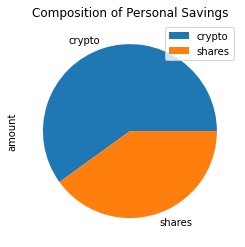

In [100]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")


In [101]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")


Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [104]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-05', tz='America/New_York').isoformat()

In [108]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()


AGG                                           SPY           \
              open      high       low   close   volume     open     high   
2021-03-16  113.97  114.0320  113.7800  113.87  3977851  397.070  397.830   
2021-03-17  113.55  113.9778  113.4800  113.87  5023810  394.530  398.120   
2021-03-18  113.32  113.8600  113.2000  113.42  6077516  394.475  396.720   
2021-03-19  113.40  113.5400  113.3300  113.50  4674852  389.880  391.569   
2021-03-22  113.70  113.8000  113.6022  113.75  5321817  390.030  394.070   

                                      
               low   close    volume  
2021-03-16  395.08  395.94  65719794  
2021-03-17  393.30  397.22  61876016  
2021-03-18  390.75  391.41  98794050  
2021-03-19  387.15  389.50  93819590  
2021-03-22  389.97  392.54  61372559

In [109]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)


In [110]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()


AGG                                                        SPY  \
              open      high       low   close   volume daily_return     open   
2021-03-16  113.97  114.0320  113.7800  113.87  3977851          NaN  397.070   
2021-03-17  113.55  113.9778  113.4800  113.87  5023810     0.000000  394.530   
2021-03-18  113.32  113.8600  113.2000  113.42  6077516    -0.003952  394.475   
2021-03-19  113.40  113.5400  113.3300  113.50  4674852     0.000705  389.880   
2021-03-22  113.70  113.8000  113.6022  113.75  5321817     0.002203  390.030   

                                                            
               high     low   close    volume daily_return  
2021-03-16  397.830  395.08  395.94  65719794          NaN  
2021-03-17  398.120  393.30  397.22  61876016     0.003233  
2021-03-18  396.720  390.75  391.41  98794050    -0.014627  
2021-03-19  391.569  387.15  389.50  93819590    -0.004880  
2021-03-22  394.070  389.97  392.54  61372559     0.007805

In [111]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001278,1.007814,1.003502,0.998324,0.997017,1.002627,1.000866,0.997585,0.997195,1.002063,...,1.001431,0.999254,1.004159,1.001725,1.004206,0.991802,0.995926,1.007171,0.995582,0.998203
2,0.996568,1.011995,1.000843,1.000502,0.999327,1.008809,0.995944,0.993764,0.996777,1.002890,...,0.996722,1.000184,1.005017,1.008297,1.004152,0.992286,0.991631,1.009895,0.994859,0.994685
3,0.994782,1.010458,0.999281,1.003629,1.001831,1.011990,1.001042,1.000990,1.005143,1.009054,...,1.003924,0.996976,1.006139,1.007970,1.008681,0.996779,0.990806,1.006319,0.992785,0.999409
4,0.999098,1.007130,0.991446,0.998140,1.001759,1.012535,0.998578,0.999867,1.008738,1.016387,...,0.998110,0.996311,1.003298,1.004968,1.013130,0.995567,0.992663,1.008510,0.993948,0.991693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,474.546147,360.330870,203.424674,320.069900,250.668235,215.202650,264.428389,399.817991,331.569421,361.798910,...,325.656121,169.641240,210.840513,519.168848,282.539614,143.470270,272.962435,400.684430,299.785512,304.752051
7557,472.025243,363.242982,203.619594,322.617362,250.583926,213.465121,267.313196,399.855252,330.749596,360.699521,...,325.976577,170.041904,210.988001,513.724902,281.902670,144.210565,274.497353,401.288948,299.589517,303.335935
7558,475.378803,366.628798,204.518537,323.942886,250.078320,212.336623,266.211288,400.661724,332.569295,361.040618,...,323.938899,169.808296,210.781747,512.795248,281.055864,142.825037,274.646369,402.081186,300.071865,302.238305
7559,472.497821,366.514750,204.611651,324.231398,252.094666,214.236680,265.444341,401.541672,331.500146,360.900906,...,322.380757,169.601802,212.334582,512.444460,281.385151,143.205584,275.793227,403.340520,302.861259,303.841137


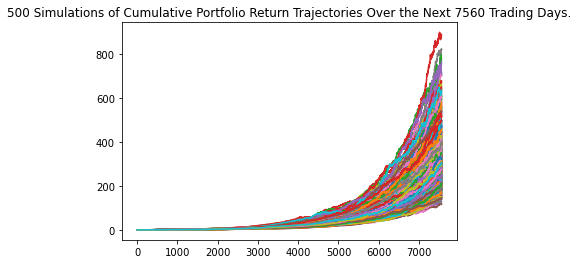

In [155]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()


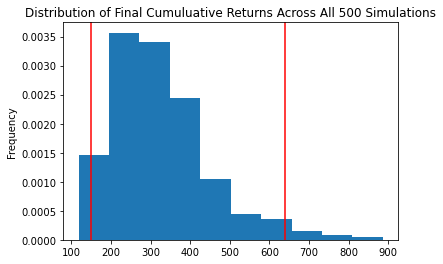

In [113]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)


count           500.000000
mean             22.130012
std              16.088798
min               2.342293
25%              10.465170
50%              17.476764
75%              29.550007
max             104.663919
95% CI Lower      4.779747
95% CI Upper     64.053604
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [114]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close   volume daily_return     open   
2021-03-16  113.97  114.0320  113.7800  113.87  3977851          NaN  397.070   
2021-03-17  113.55  113.9778  113.4800  113.87  5023810     0.000000  394.530   
2021-03-18  113.32  113.8600  113.2000  113.42  6077516    -0.003952  394.475   
2021-03-19  113.40  113.5400  113.3300  113.50  4674852     0.000705  389.880   
2021-03-22  113.70  113.8000  113.6022  113.75  5321817     0.002203  390.030   

                                                            
               high     low   close    volume daily_return  
2021-03-16  397.830  395.08  395.94  65719794          NaN  
2021-03-17  398.120  393.30  397.22  61876016     0.003233  
2021-03-18  396.720  390.75  391.41  98794050    -0.014627  
2021-03-19  391.569  387.15  389.50  93819590    -0.004880  
2021-03-22  394.070  389.97  392.54  61372559     0.007805

In [115]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004447,0.998680,0.997620,0.996621,1.004057,0.999037,0.995916,1.003701,1.001025,0.995697,...,0.992657,1.005438,0.994440,1.005040,0.999161,0.994040,1.008212,1.003173,1.006644,1.007964
2,1.008129,1.005591,1.002663,0.997248,1.003699,0.998990,0.992056,1.007401,1.005303,0.998459,...,1.003995,1.012937,0.991578,1.008534,0.994446,0.997341,1.008354,1.006588,1.005220,1.002224
3,1.007715,1.003579,1.000905,1.003880,1.004276,0.997204,0.997197,1.012773,1.005625,1.002143,...,1.006905,1.018501,0.994382,1.007279,0.996724,1.002016,1.006528,1.005581,1.003781,1.004189
4,1.006392,1.003131,0.995152,1.001663,1.005856,0.997830,1.003537,1.015194,1.004180,1.002869,...,1.005663,1.011297,1.001094,1.006131,1.004098,1.006050,1.003574,0.996903,1.003578,0.999919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.431913,2.726701,2.732064,2.774974,2.355529,2.792005,3.444572,2.343398,2.369396,2.724969,...,2.876935,2.663269,2.662121,2.308559,2.500044,2.564962,2.424593,2.546902,2.646223,3.021483
1257,2.431161,2.733039,2.744040,2.792058,2.353257,2.799983,3.443665,2.343468,2.371372,2.752228,...,2.890537,2.666674,2.659288,2.308633,2.508988,2.572621,2.431179,2.518015,2.646498,3.042647
1258,2.413745,2.756008,2.738933,2.790040,2.354912,2.790330,3.430958,2.344871,2.371199,2.743916,...,2.890941,2.663715,2.651964,2.304646,2.518814,2.600522,2.432702,2.509408,2.666968,3.059187
1259,2.424636,2.762113,2.742563,2.795125,2.378442,2.804334,3.435891,2.340986,2.382867,2.755369,...,2.906885,2.656139,2.661649,2.310826,2.516841,2.579715,2.435853,2.512608,2.672530,3.054435


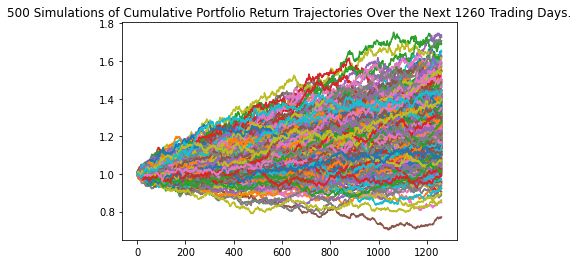

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()


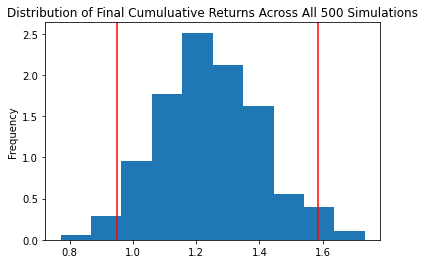

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()


In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)


count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close   volume daily_return     open   
2021-03-16  113.97  114.0320  113.7800  113.87  3977851          NaN  397.070   
2021-03-17  113.55  113.9778  113.4800  113.87  5023810     0.000000  394.530   
2021-03-18  113.32  113.8600  113.2000  113.42  6077516    -0.003952  394.475   
2021-03-19  113.40  113.5400  113.3300  113.50  4674852     0.000705  389.880   
2021-03-22  113.70  113.8000  113.6022  113.75  5321817     0.002203  390.030   

                                                            
               high     low   close    volume daily_return  
2021-03-16  397.830  395.08  395.94  65719794          NaN  
2021-03-17  398.120  393.30  397.22  61876016     0.003233  
2021-03-18  396.720  390.75  391.41  98794050    -0.014627  
2021-03-19  391.569  387.15  389.50  93819590    -0.004880  
2021-03-22  394.070  389.97  392.54  61372559     0.007805

In [117]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005257,1.000684,1.001620,0.993183,1.000519,1.003924,1.007648,0.994418,1.003961,1.000111,...,1.000392,1.003278,1.002125,0.998045,1.005432,0.997450,0.995181,1.005821,0.999328,0.996309
2,1.010385,0.999673,1.002783,0.993577,1.002016,1.005990,1.005239,1.005943,1.006200,1.004062,...,1.002893,1.003497,1.002098,1.003234,1.007321,0.996629,0.995446,1.011126,0.998990,0.989105
3,1.011193,0.997468,1.005565,0.994643,0.998256,1.009830,1.008262,1.002462,1.002314,1.001760,...,1.007777,1.004385,0.994750,1.003574,1.008970,1.003262,1.005047,1.018338,1.000474,0.996369
4,1.014060,0.995093,1.008123,0.994880,0.994818,1.018361,1.010963,1.002171,1.010065,1.003468,...,1.006577,1.009348,0.993721,1.004073,1.010442,1.005180,1.012269,1.019202,1.004547,0.998705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.043669,7.956667,5.101597,6.118381,6.663475,5.695747,4.609595,5.698592,6.459652,6.315225,...,5.722390,9.721467,6.174973,5.867492,6.315630,5.647766,8.611783,4.720475,9.394972,7.165263
2517,6.031685,8.013207,5.093071,6.129430,6.666347,5.710307,4.615558,5.722878,6.421107,6.319602,...,5.756401,9.652644,6.125479,5.884520,6.364965,5.646625,8.584918,4.720412,9.374727,7.152033
2518,5.991261,8.015808,5.096529,6.151010,6.653287,5.712161,4.623204,5.694786,6.464441,6.326023,...,5.744580,9.605231,6.163760,5.871771,6.445547,5.684953,8.562675,4.716574,9.415907,7.198061
2519,5.979301,8.084926,5.104483,6.184692,6.658218,5.666567,4.627972,5.703428,6.431882,6.337462,...,5.760534,9.568665,6.158426,5.890760,6.470367,5.658162,8.506373,4.731506,9.432955,7.117134


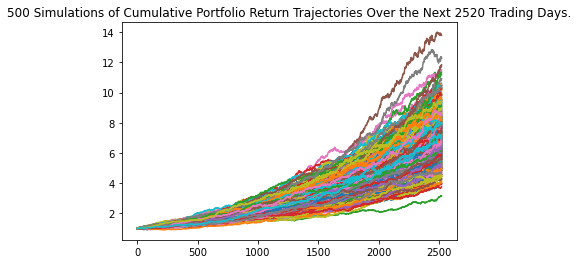

In [118]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()


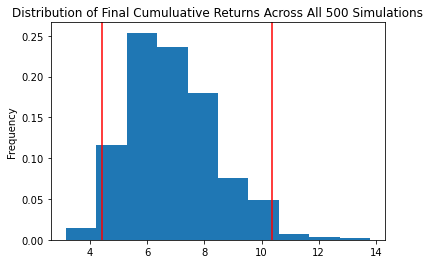

In [119]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_ten = MC_even_dist_ten.plot_distribution()


In [124]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)


count           500.000000
mean              6.919855
std               1.589177
min               3.156659
25%               5.744550
50%               6.714767
75%               7.909977
max              13.798192
95% CI Lower      4.430143
95% CI Upper     10.375461
Name: 2520, dtype: float64


In [127]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $265808.61 and $622527.69
